# Simulated tracks exposed all the time

In [2]:
from Halite import *
from paleopy import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [4]:
import paleopy as paleopy

halite = paleopy.Mineral("Halite")

In [5]:
name = ['100yr', '300yr', '1kyr', '3kyr', '10kyr', '30kyr', '100kyr', '300kyr'] #intestazioni durate dei flussi
arr_time = [200*1e-6, (650-200)*1e-6, (2000-650)*1e-6, (6500-2000)*1e-6, (0.02-0.0065), (0.065-0.02), (0.2-0.065), (0.27-0.2)] #tempi tra un flusso e l'altro
tot_time= 0.3 #in Myr

## dR/dE

/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)
/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)
/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)


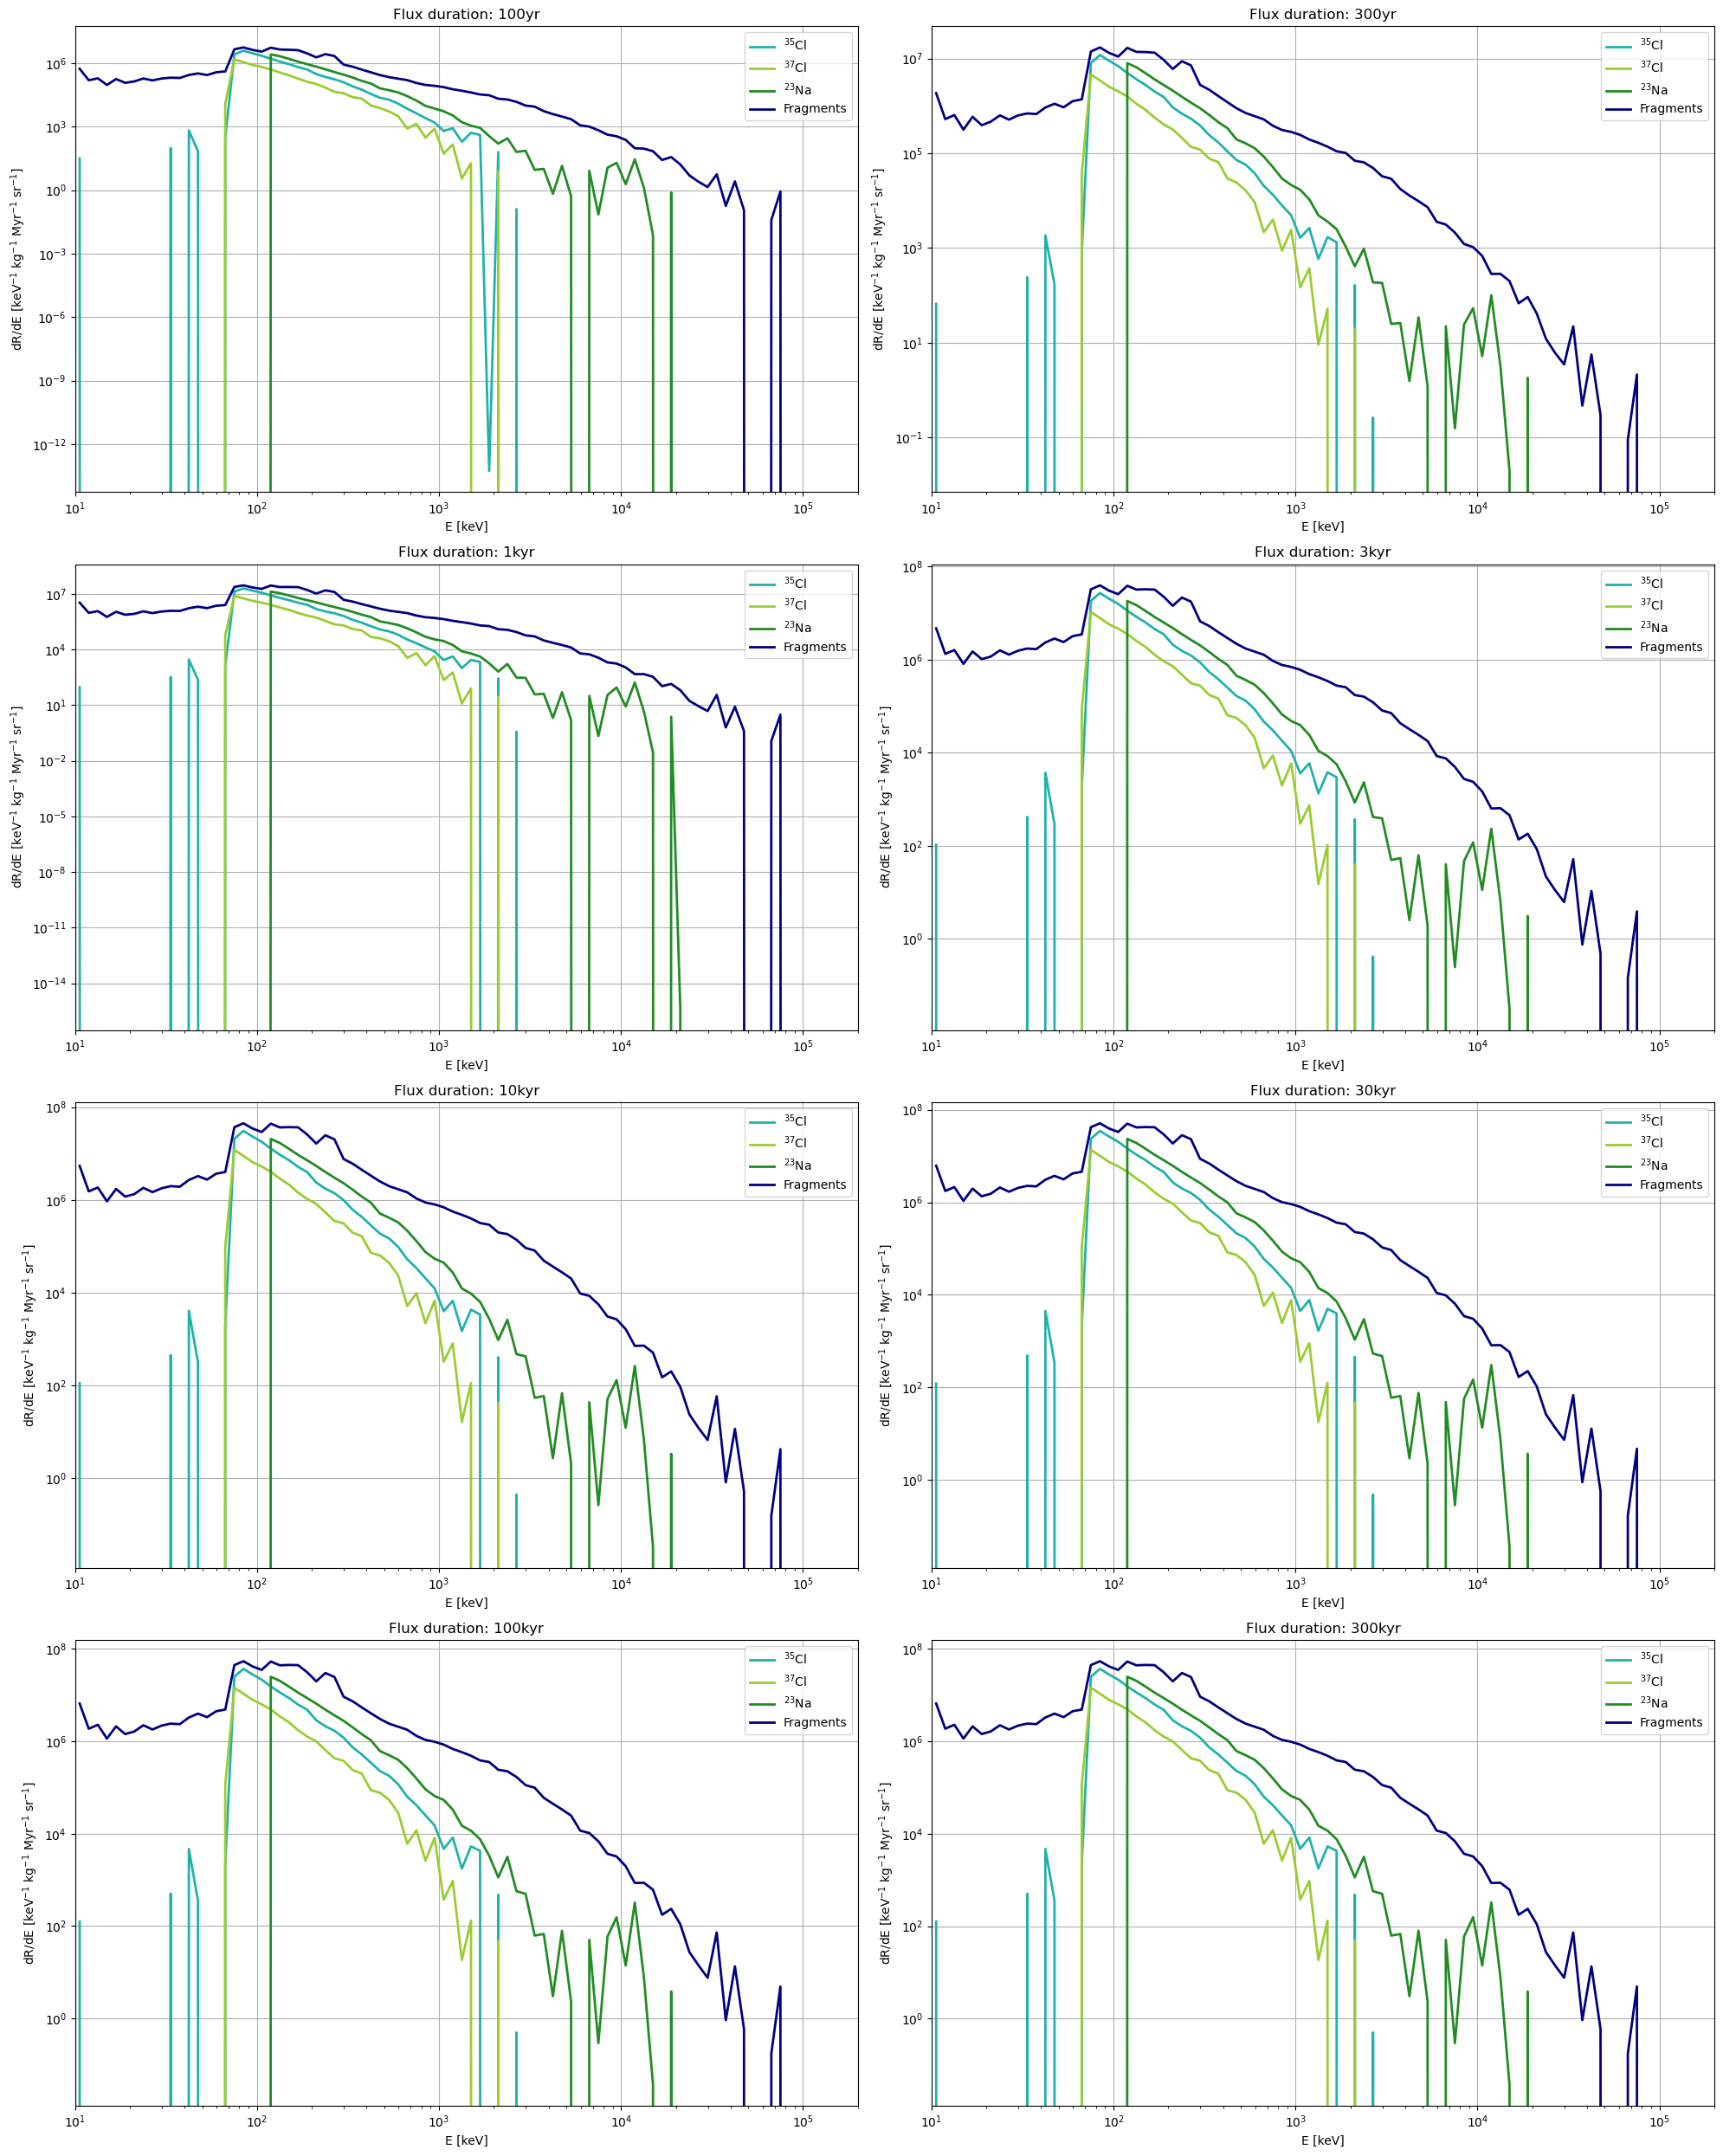

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# Assicurati di avere definite le funzioni log_interp1d, Integration, Count e Stampa

listfunc = []
# Supponiamo che "name" sia una lista di identificatori (stringhe) per le diverse durate, ad esempio:
# name = ['100yr', '300yr', '1kyr', '3kyr', '10kyr', '30kyr', '100kyr', '300kyr']

# Prepara la figura con 8 subplot (2 righe x 4 colonne)
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()  # per iterare comodamente su ciascun subplot

for idx, i in enumerate(name):
    # Carica i dati dal file corrispondente
    x, y = np.loadtxt('MuonFluxes/SN20pc' + i + '.txt', usecols=(0, 1), unpack=True)
    y = y[:-1] / np.diff(x)
    x = x[:-1]
    # Crea la funzione interpolata in log-spazio e converte l'unità da m^2 a cm^2 (1e-4)
    listfunc.append(log_interp1d(x, 1e-4 * y))
    
    # Integrazione del flusso nel tempo
    Num = Integration(listfunc, arr_time, tot_time)
    weight = Num / 1e4  # Ripesa: ho eseguito 1e4 simulazioni, quindi normalizzo per un count singolo
    
    # Definisce i parametri per la distribuzione di energia
    n = 101  # numero di bin
    Er = np.logspace(-2, 3, n)  # Energia in MeV: da 10^-2 a 10^3 MeV
    length = 1000   # lunghezza in cm
    rho = 2.16e-3   # densità in kg/cm^3
    Er_width = np.diff(Er)            # larghezza dei bin
    Er_mid = Er[:-1] + Er_width / 2    # centro dei bin
    
    # Ottieni i conteggi per i vari nuclei; Count restituisce:
    # Count[0] -> conteggi per ^35Cl, Count[1] -> per ^37Cl, Count[2] -> per ^23Na,
    # Count[3] -> per frammenti, Count[4] -> nomi dei nuclei (o lunghezze dei vettori)
    Conta = Count(weight, Er)
    
    # Somma i conteggi dei frammenti per ciascun bin di energia
    Frag = np.zeros(len(Er_mid))
    for k in range(len(Conta[4])):
        for j in range(len(Er_mid)):
            Frag[j] += Conta[3][k][j]
    
    # Interpola i conteggi normalizzati per ciascun nucleo
    F35 = interp1d(Er_mid, Conta[0] / Er_width, fill_value='extrapolate')
    F37 = interp1d(Er_mid, Conta[1] / Er_width, fill_value='extrapolate')
    F23 = interp1d(Er_mid, Conta[2] / Er_width, fill_value='extrapolate')
    
    # Seleziona il subplot corrente
    ax = axes[idx]
    
    # Effettua il plot in scala log-log
    ax.loglog(Er_mid * 1e3, F35(Er_mid) * 1e-3 / (length * rho), label="$^{35}$Cl", linewidth=2, color='lightseagreen')
    ax.loglog(Er_mid * 1e3, F37(Er_mid) * 1e-3 / (length * rho), label="$^{37}$Cl", linewidth=2, color='yellowgreen')
    ax.loglog(Er_mid * 1e3, F23(Er_mid) * 1e-3 / (length * rho), label="$^{23}$Na", linewidth=2, color='forestgreen')
    ax.loglog(Er_mid * 1e3, Frag * 1e-3 / Er_width / (length * rho), label="Fragments", linewidth=2, color='navy')
    
    ax.set_xlabel("E [keV]")
    ax.set_ylabel("dR/dE [keV$^{-1}$ kg$^{-1}$ Myr$^{-1}$ sr$^{-1}$]")
    ax.set_xlim(1e1, 2e5)
    ax.grid(True)
    ax.legend()
    
    ax.set_title("Flux duration: " + i)
    # Salva i dati o esegui ulteriori operazioni con la funzione Stampa
    Stampa('20pc', i, Conta, Er)
    #print(i)

plt.tight_layout()
plt.savefig("recoil_halite/plot/nuclear_recoil_20pc_all.png", bbox_inches="tight")
plt.show()


100yr
300yr
1kyr
3kyr
10kyr


/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)


30kyr


/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)


100kyr


/home/fefe/Thesis/all_you_need/geant/Halite.py:42: RuntimeWarning: divide by zero encountered in log10
  logy = np.log10(yy)


300kyr


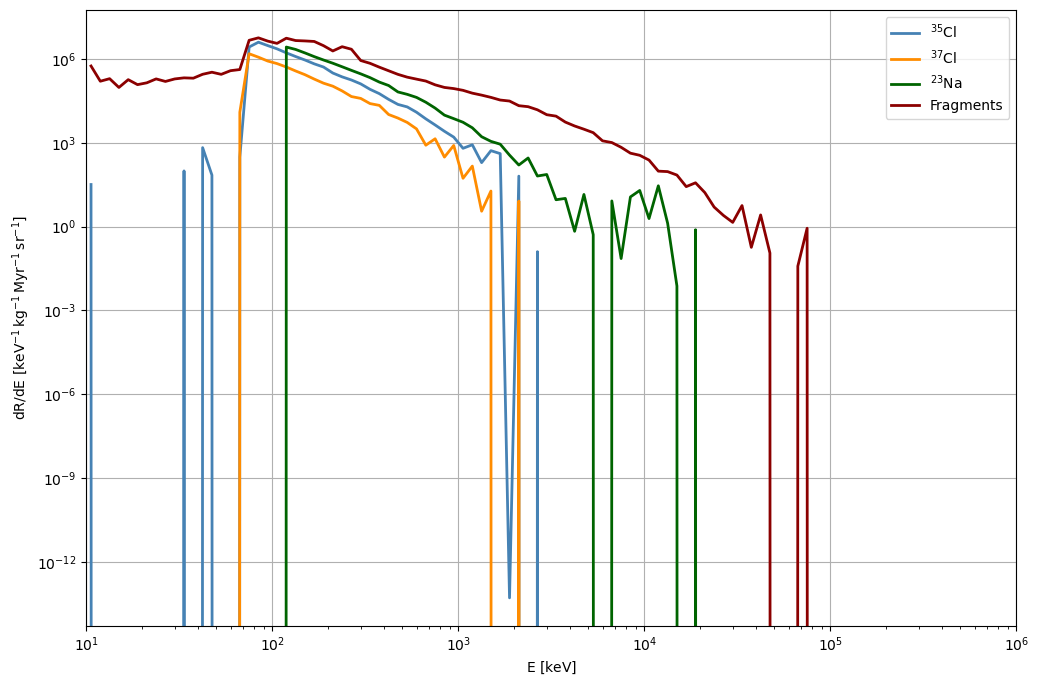

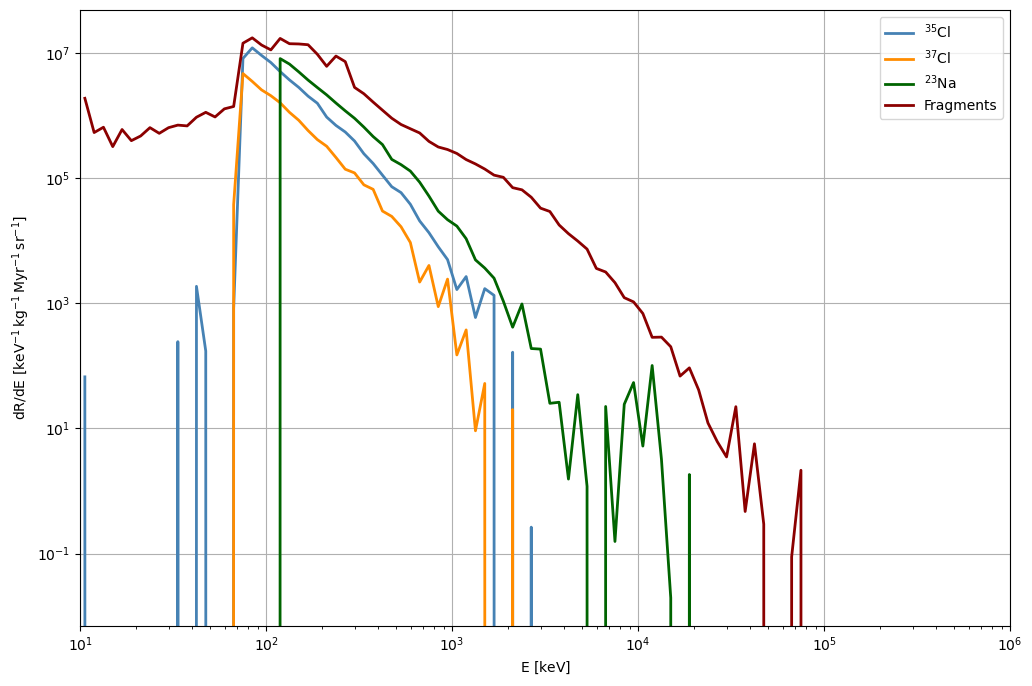

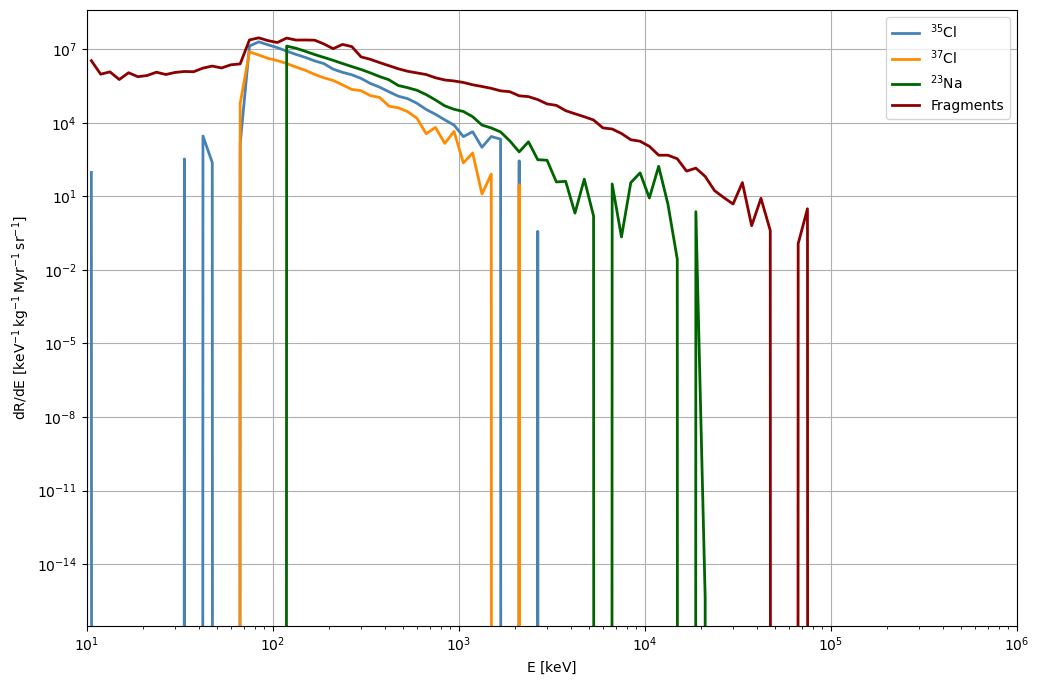

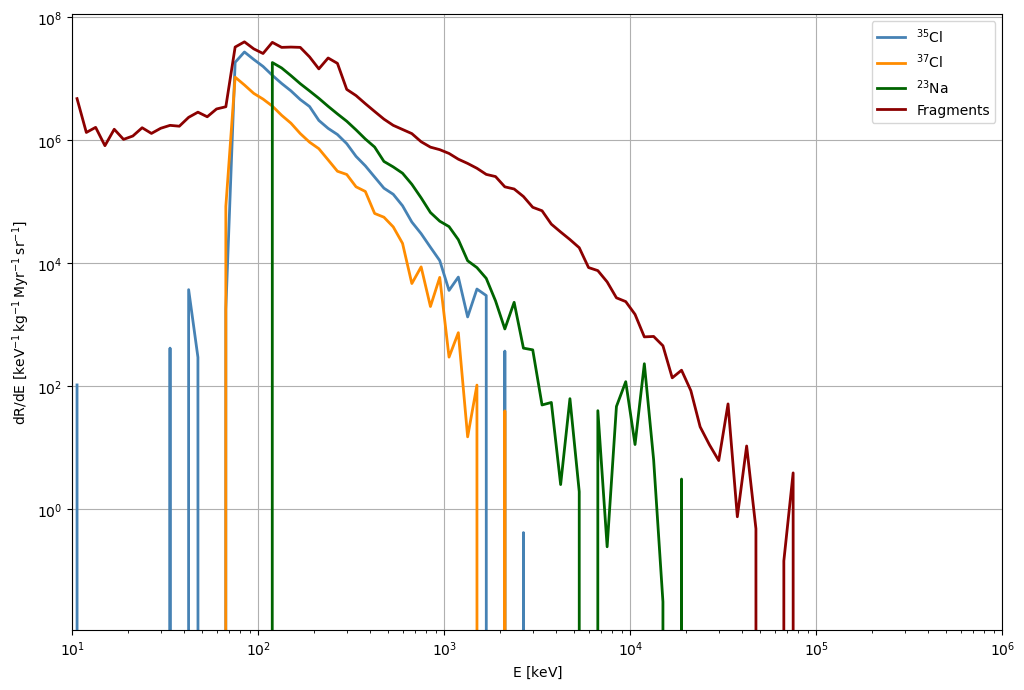

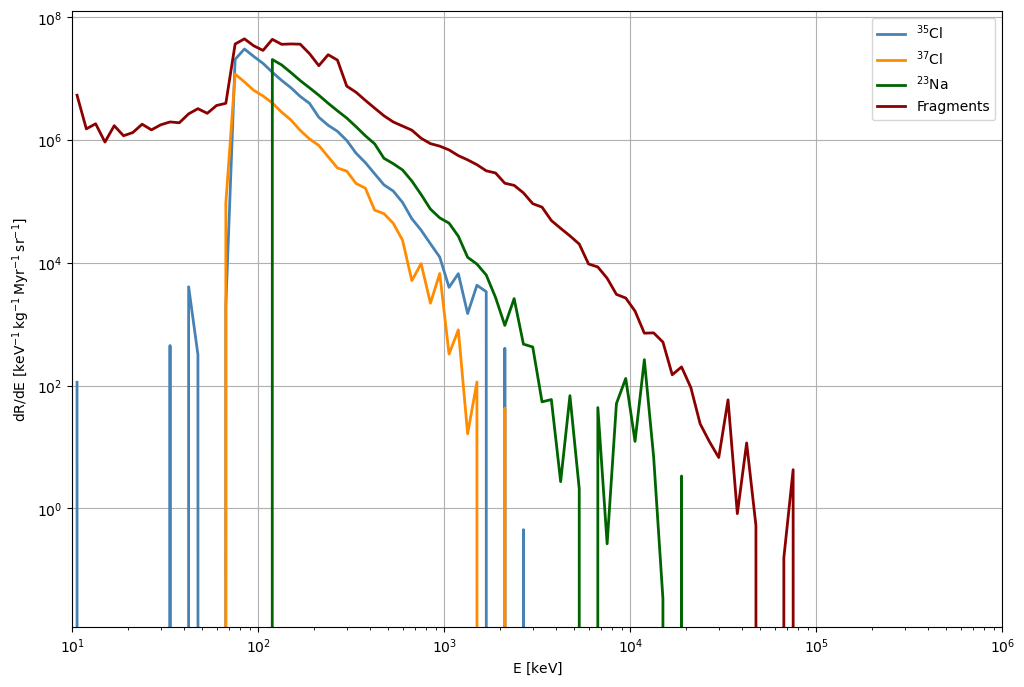

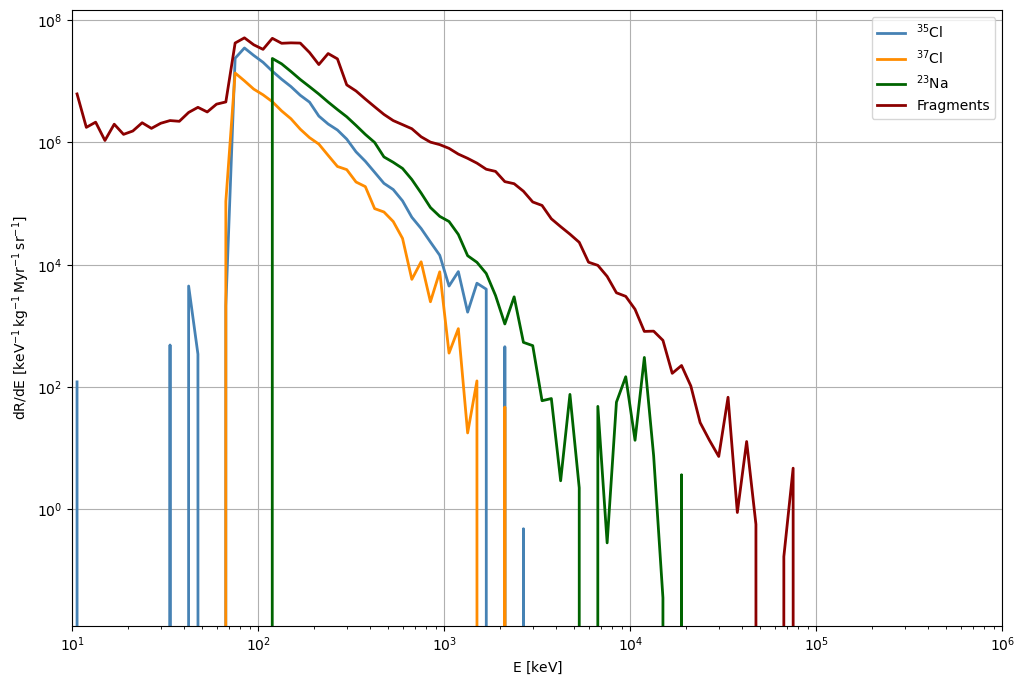

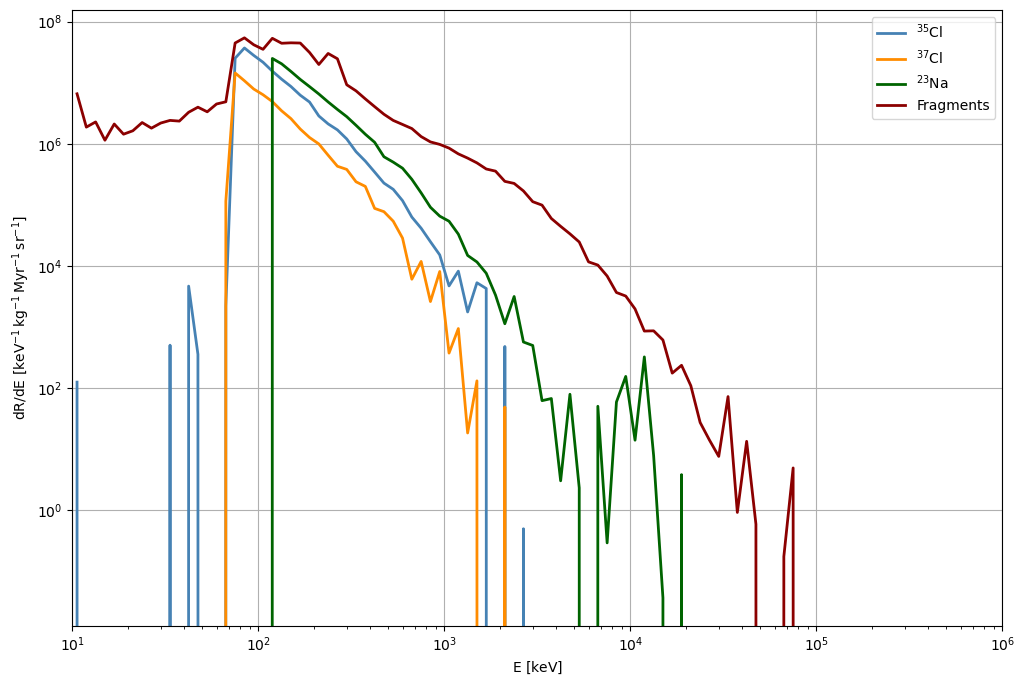

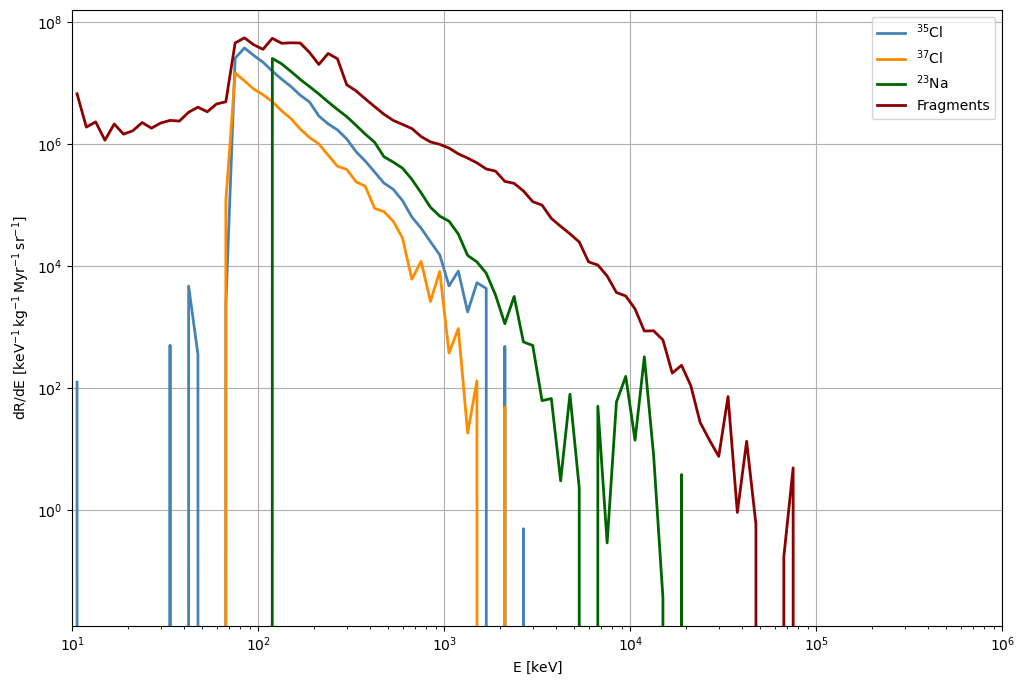

In [6]:
listfunc = []
for i in name:
    x,y = np.loadtxt('MuonFluxes/SN20pc'+i+'.txt', usecols = (0,1), unpack = 'true')
    y = y[:-1]/np.diff(x)
    x = x[:-1]
    listfunc.append(log_interp1d(x,1e-4*y)) #crea listfunc con i flussi da una supernova a 20 pc per diversi tempi di esposizione (1e-4 per passare da m2 a cm2)

    Num = Integration(listfunc, arr_time, tot_time) #integro i miei flussi nel tempo
    weight = Num/1e4 #perchè ho fatto 1e4 simulazioni, quindi devo ripesare per un solo count
    n = 101 #bin in cui divido l'energia
    Er = np.logspace(-2, 3, n) #MeV da 10^-2 a 10^3 MeV in 101 bins
    length = 1000 #cm 
    rho = 2.16*1e-3 #kg/cm^3
    Er_width = np.diff(Er) #differenzio l'energia
    Er_mid = Er[:-1] + Er_width/2 #calcolo i centri dei bin di energia

    Conta = Count(weight, Er) #restituisce gli array dei vari nuclei con i rispettivi conteggi, 0,1 Cl; 2 Na; 3 Frag; 4 nomi dei nuclei

    #plots
    plt.figure(figsize=(12,8))
    
    Er_width = np.diff(Er) #differenza tra un valore dell'array e quella precedente = larghezza del bin
    Er_mid = Er[:-1] + Er_width/2 #punto medio del bin

    Frag = np.zeros(len(Er_mid)) #crea array con tutti i punti medi dei bin di energia
    for k in range (len(Count[4])): #Count[4]=lunghezza di nuclei
        for i in range(len(Er_mid)):
            Frag[i] += Count[3][k][i] #somma i bin dei vari nuclei

    F35 = interp1d(Er_mid, Count[0]/Er_width, fill_value='extrapolate') #interpola in modo log i frammenti dei nuclei di alite
    F37 = interp1d(Er_mid, Count[1]/Er_width, fill_value='extrapolate')
    F23 = interp1d(Er_mid, Count[2]/Er_width, fill_value='extrapolate')

    plt.loglog(Er_mid*1e3, F35(Er_mid)*1e-3/(length*rho), label = "$^{35}$Cl", linewidth = 2, color='steelblue') #1000*punto medio del bin, count di quel frammento in quel bin di E (dR/dE)
    plt.loglog(Er_mid*1e3, F37(Er_mid)*1e-3/(length*rho), label = "$^{37}$Cl", linewidth = 2, color='darkorange')
    plt.loglog(Er_mid*1e3, F23(Er_mid)*1e-3/(length*rho), label = "$^{23}$Na", linewidth = 2, color='darkgreen')        
    plt.loglog(Er_mid*1e3, Frag*1e-3/Er_width/(length*rho), label = 'Fragments', linewidth = 2, color='darkred')

    plt.xlabel("E [$\\mathrm{keV}$]")
    plt.ylabel("dR/dE [$\\mathrm{keV}^{-1}\,\\mathrm{kg}^{-1}\,\\mathrm{Myr}^{-1}\,\\mathrm{sr}^{-1}$]")
    plt.xlim(1e1,1e6)
    #plt.ylim([1e-1, 1e6])
    plt.grid(True)
    plt.legend()
    plt.savefig("recoil_halite/plot/nuclear_recoil_20pc"+i+".png", bbox_inches="tight")
    Stampa('20pc', i, Conta, Er)
    print(i)


## dR/dx

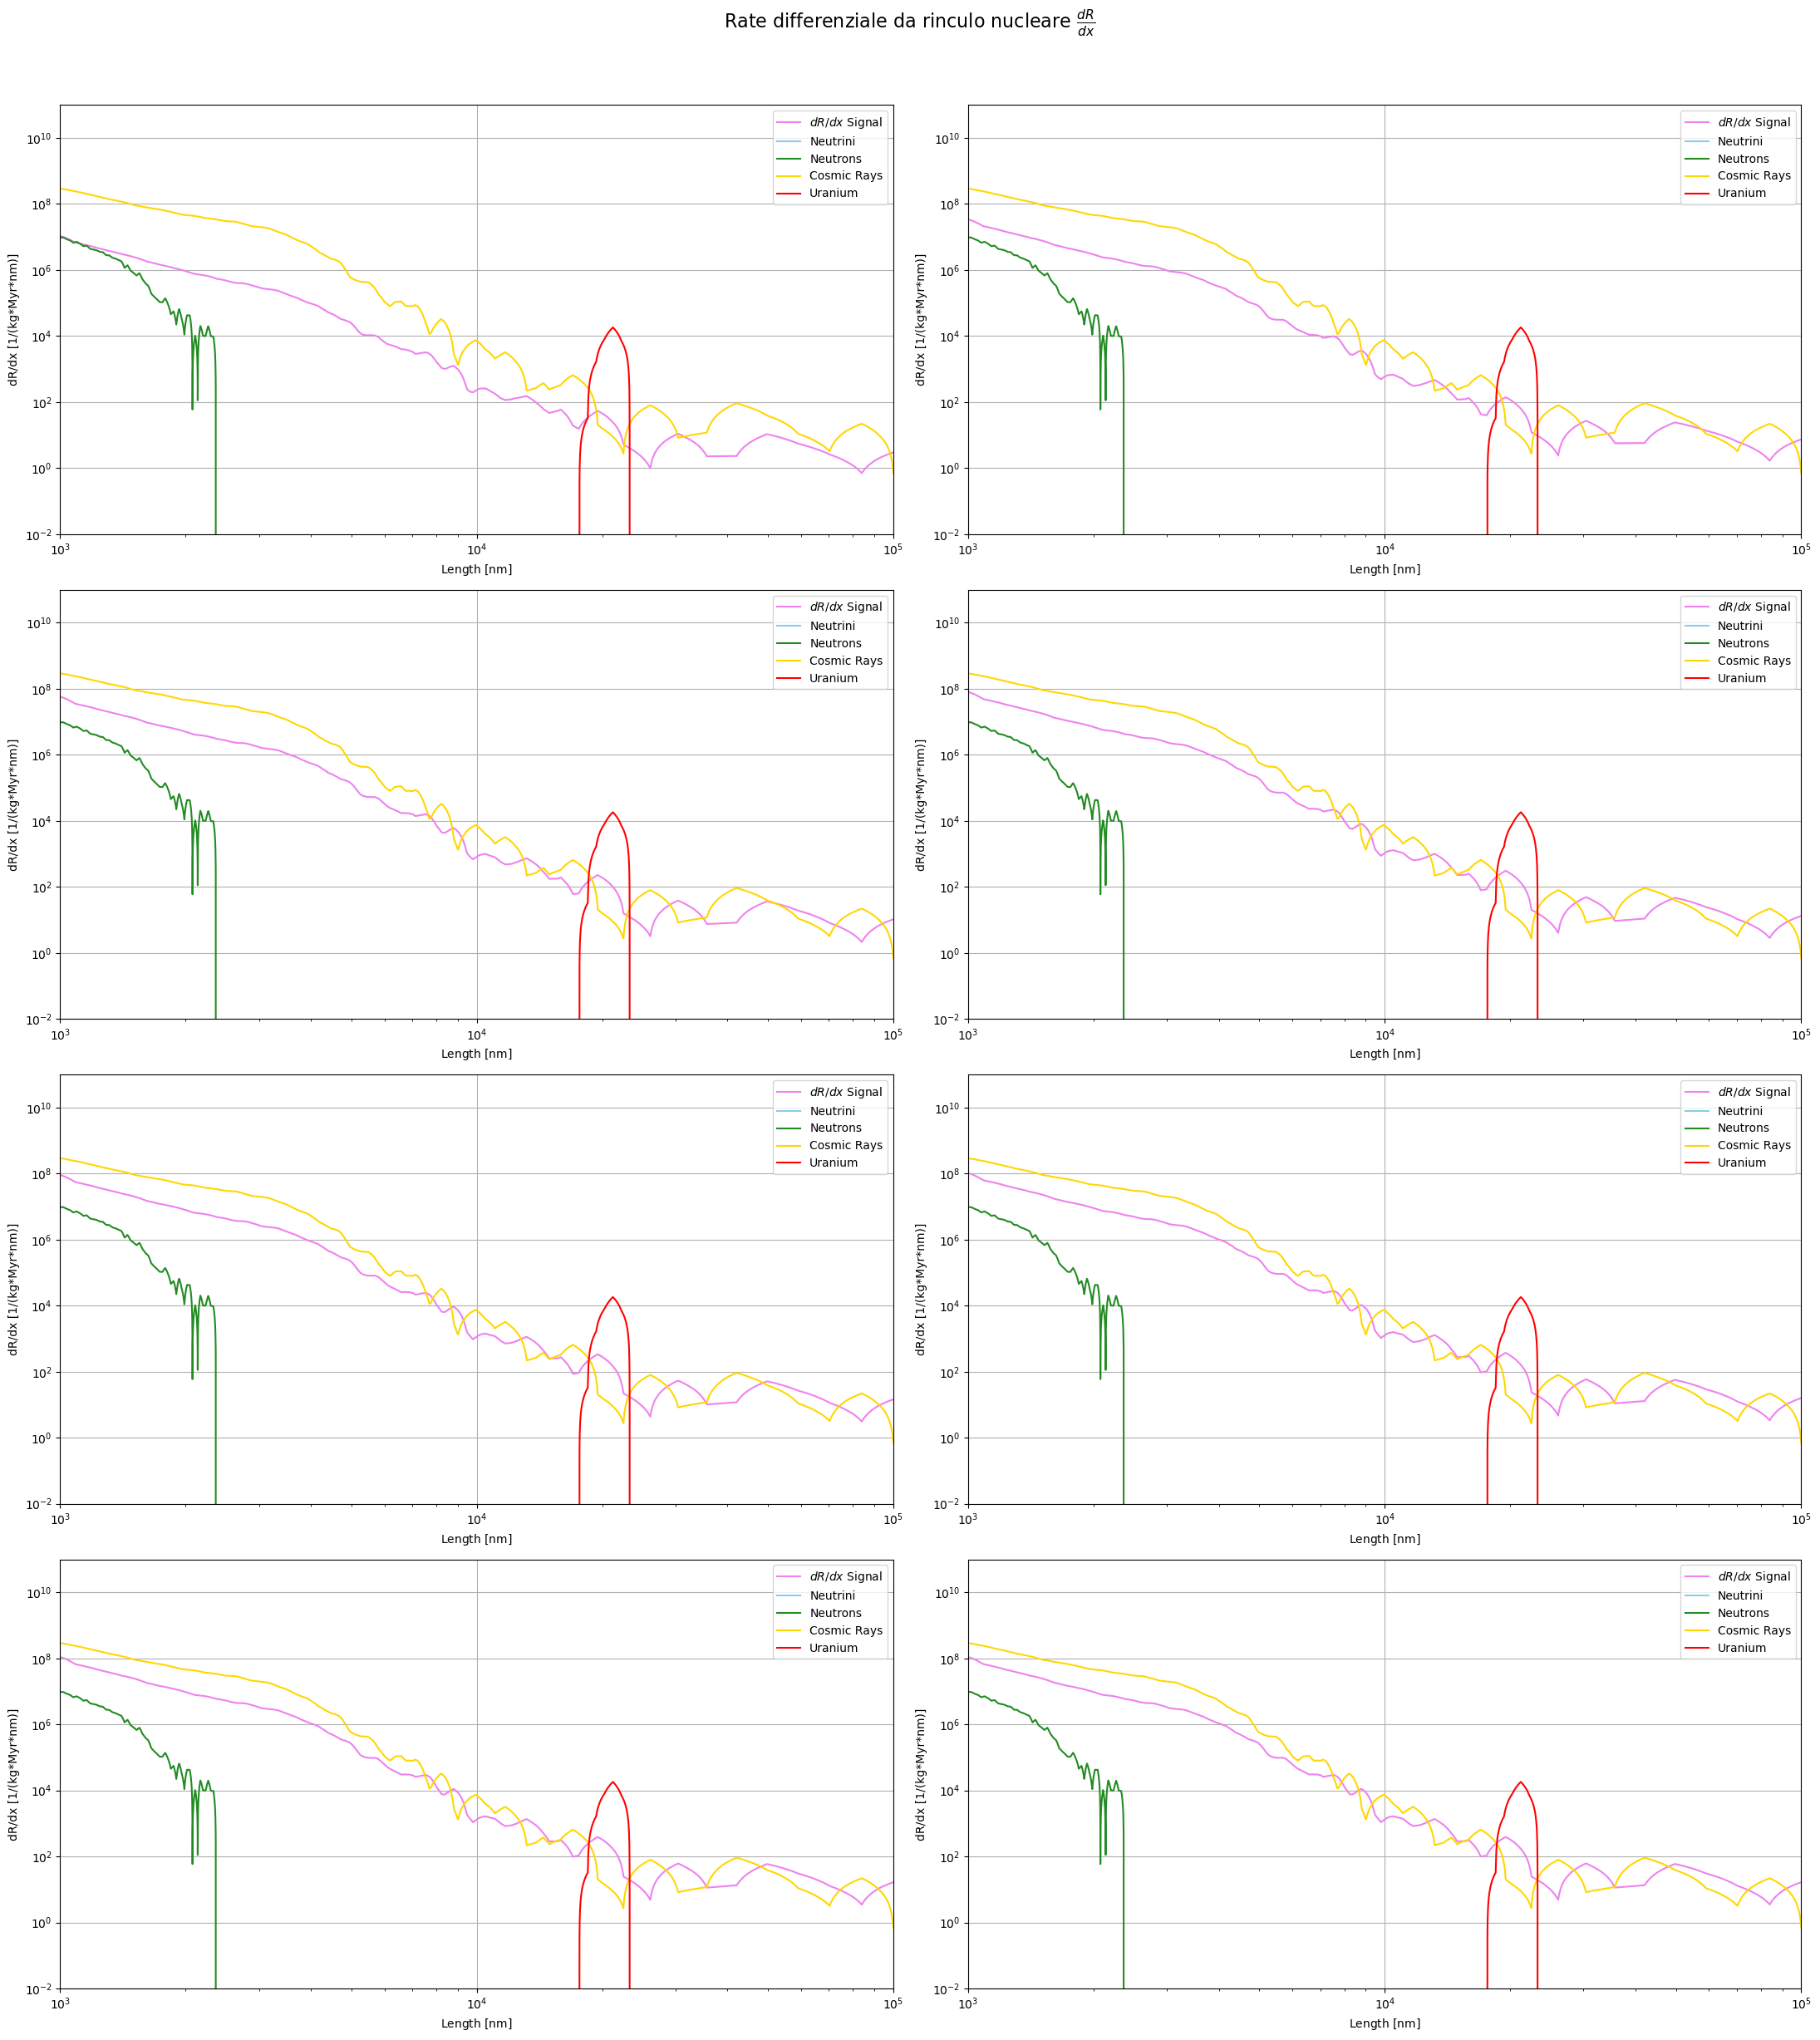

In [16]:
# Parametri iniziali
Er = np.logspace(-2, 3, 101)  # Energia in MeV
#time_exposure = 270000 * 365 * 24 * 60 * 60  # Tempo di esposizione in secondi


# Crea la figura e i subplot 4x2
fig, axs = plt.subplots(4, 2, figsize=(22, 25))
fig.suptitle("Rate differenziale da rinculo nucleare $\\frac{{dR}}{{dx}}$", fontsize=16)

for idx, n in enumerate(name):
    
    # Seleziona il subplot corrente
    if idx < axs.size:
        ax = axs.flat[idx]  # Scorri attraverso i subplot in ordine lineare

        # Aggiungo il calcolo di dR/dx (z_bins in nm)
        z_bins = np.linspace(0, 100000, 100000)
        #correzione numero di z_bins
        zz_centre = z_bins[:-1] +  np.diff(z_bins)/2.

        y_valuesSig = halite.dRdx_muons_fefe(z_bins, n)

        # Altri contributi
        y_nu        = halite.dRdx_nu(z_bins)
        y_neutrons  = halite.dRdx_neutrons(z_bins)
        y_cosmicrays = halite.dRdx_muons_new(z_bins, "Resconi")
        
        #adding Uranium tracks
        data_U = np.loadtxt("../Fission/Uranium_counts.txt", comments="#")
        i_index = data_U[:,0]   # 0..(n_bins-2)
        count_U = data_U[:,1]   # lunghezza 199

        U_x_min = 1
        U_x_max = 5
        U_n_bins = 200
        U_length = np.logspace(U_x_min, U_x_max, U_n_bins) 
        length_centers = 0.5*(U_length[:-1] + U_length[1:])
        bin_widths = U_length[1:] - U_length[:-1]

        Na  = 6.022e23
        tau = 6.45e3
        factor = 1e-5*(5.4e-7)*((1.2e-6)*Na*1e3/(238))/tau
        
        y_U = count_U / bin_widths
        f_U = interp1d(length_centers, y_U, bounds_error=False, fill_value=0.0)
        yU_interp = f_U(zz_centre)

        # Plot
        ax.loglog(zz_centre, y_valuesSig, label='$dR/dx$ Signal', color='violet')

        # Valuta tu se serve la stessa scala:
        ax.loglog(zz_centre, y_nu, label='Neutrini', color='skyblue')
        ax.loglog(zz_centre, y_neutrons, label='Neutrons', color='forestgreen')
        ax.loglog(zz_centre, y_cosmicrays, label='Cosmic Rays',color='gold') #divido per il tempo totale?
        ax.loglog(zz_centre, factor*yU_interp, label='Uranium', color='red')


        ax.set_xlabel("Length [$\\mathrm{nm}$]")
        ax.set_ylabel("dR/dx [1/(kg*Myr*nm)]")
        ax.set_xlim(1e3, 1e5)
        ax.set_ylim(1e-2, 1e11)
        ax.legend()
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Tracks integrated

In [8]:
def integrate_in_bins(x, y, x_bins, mass, tot_time):
    """
    x: array 1D con i punti su cui è definita la curva (es. zz_centre).
    y: array 1D corrispondente, con dR/dx(x).
    x_bins: bordi dei bin, ad es. np.logspace(3,5,20).

    Restituisce un array con len(x_bins)-1 valori, 
    ognuno corrispondente all'integrale di y in [x_i, x_{i+1}].
    """
    counts = np.zeros(len(x_bins) - 1)
    for i in range(len(counts)):
        # maschera per i punti x dentro il bin
        mask = (x >= x_bins[i]) & (x < x_bins[i+1])
        if np.any(mask):
            # Esempio di integrazione numerica con trapz
            counts[i] = np.trapz(y[mask], x[mask])
    return counts*mass*tot_time


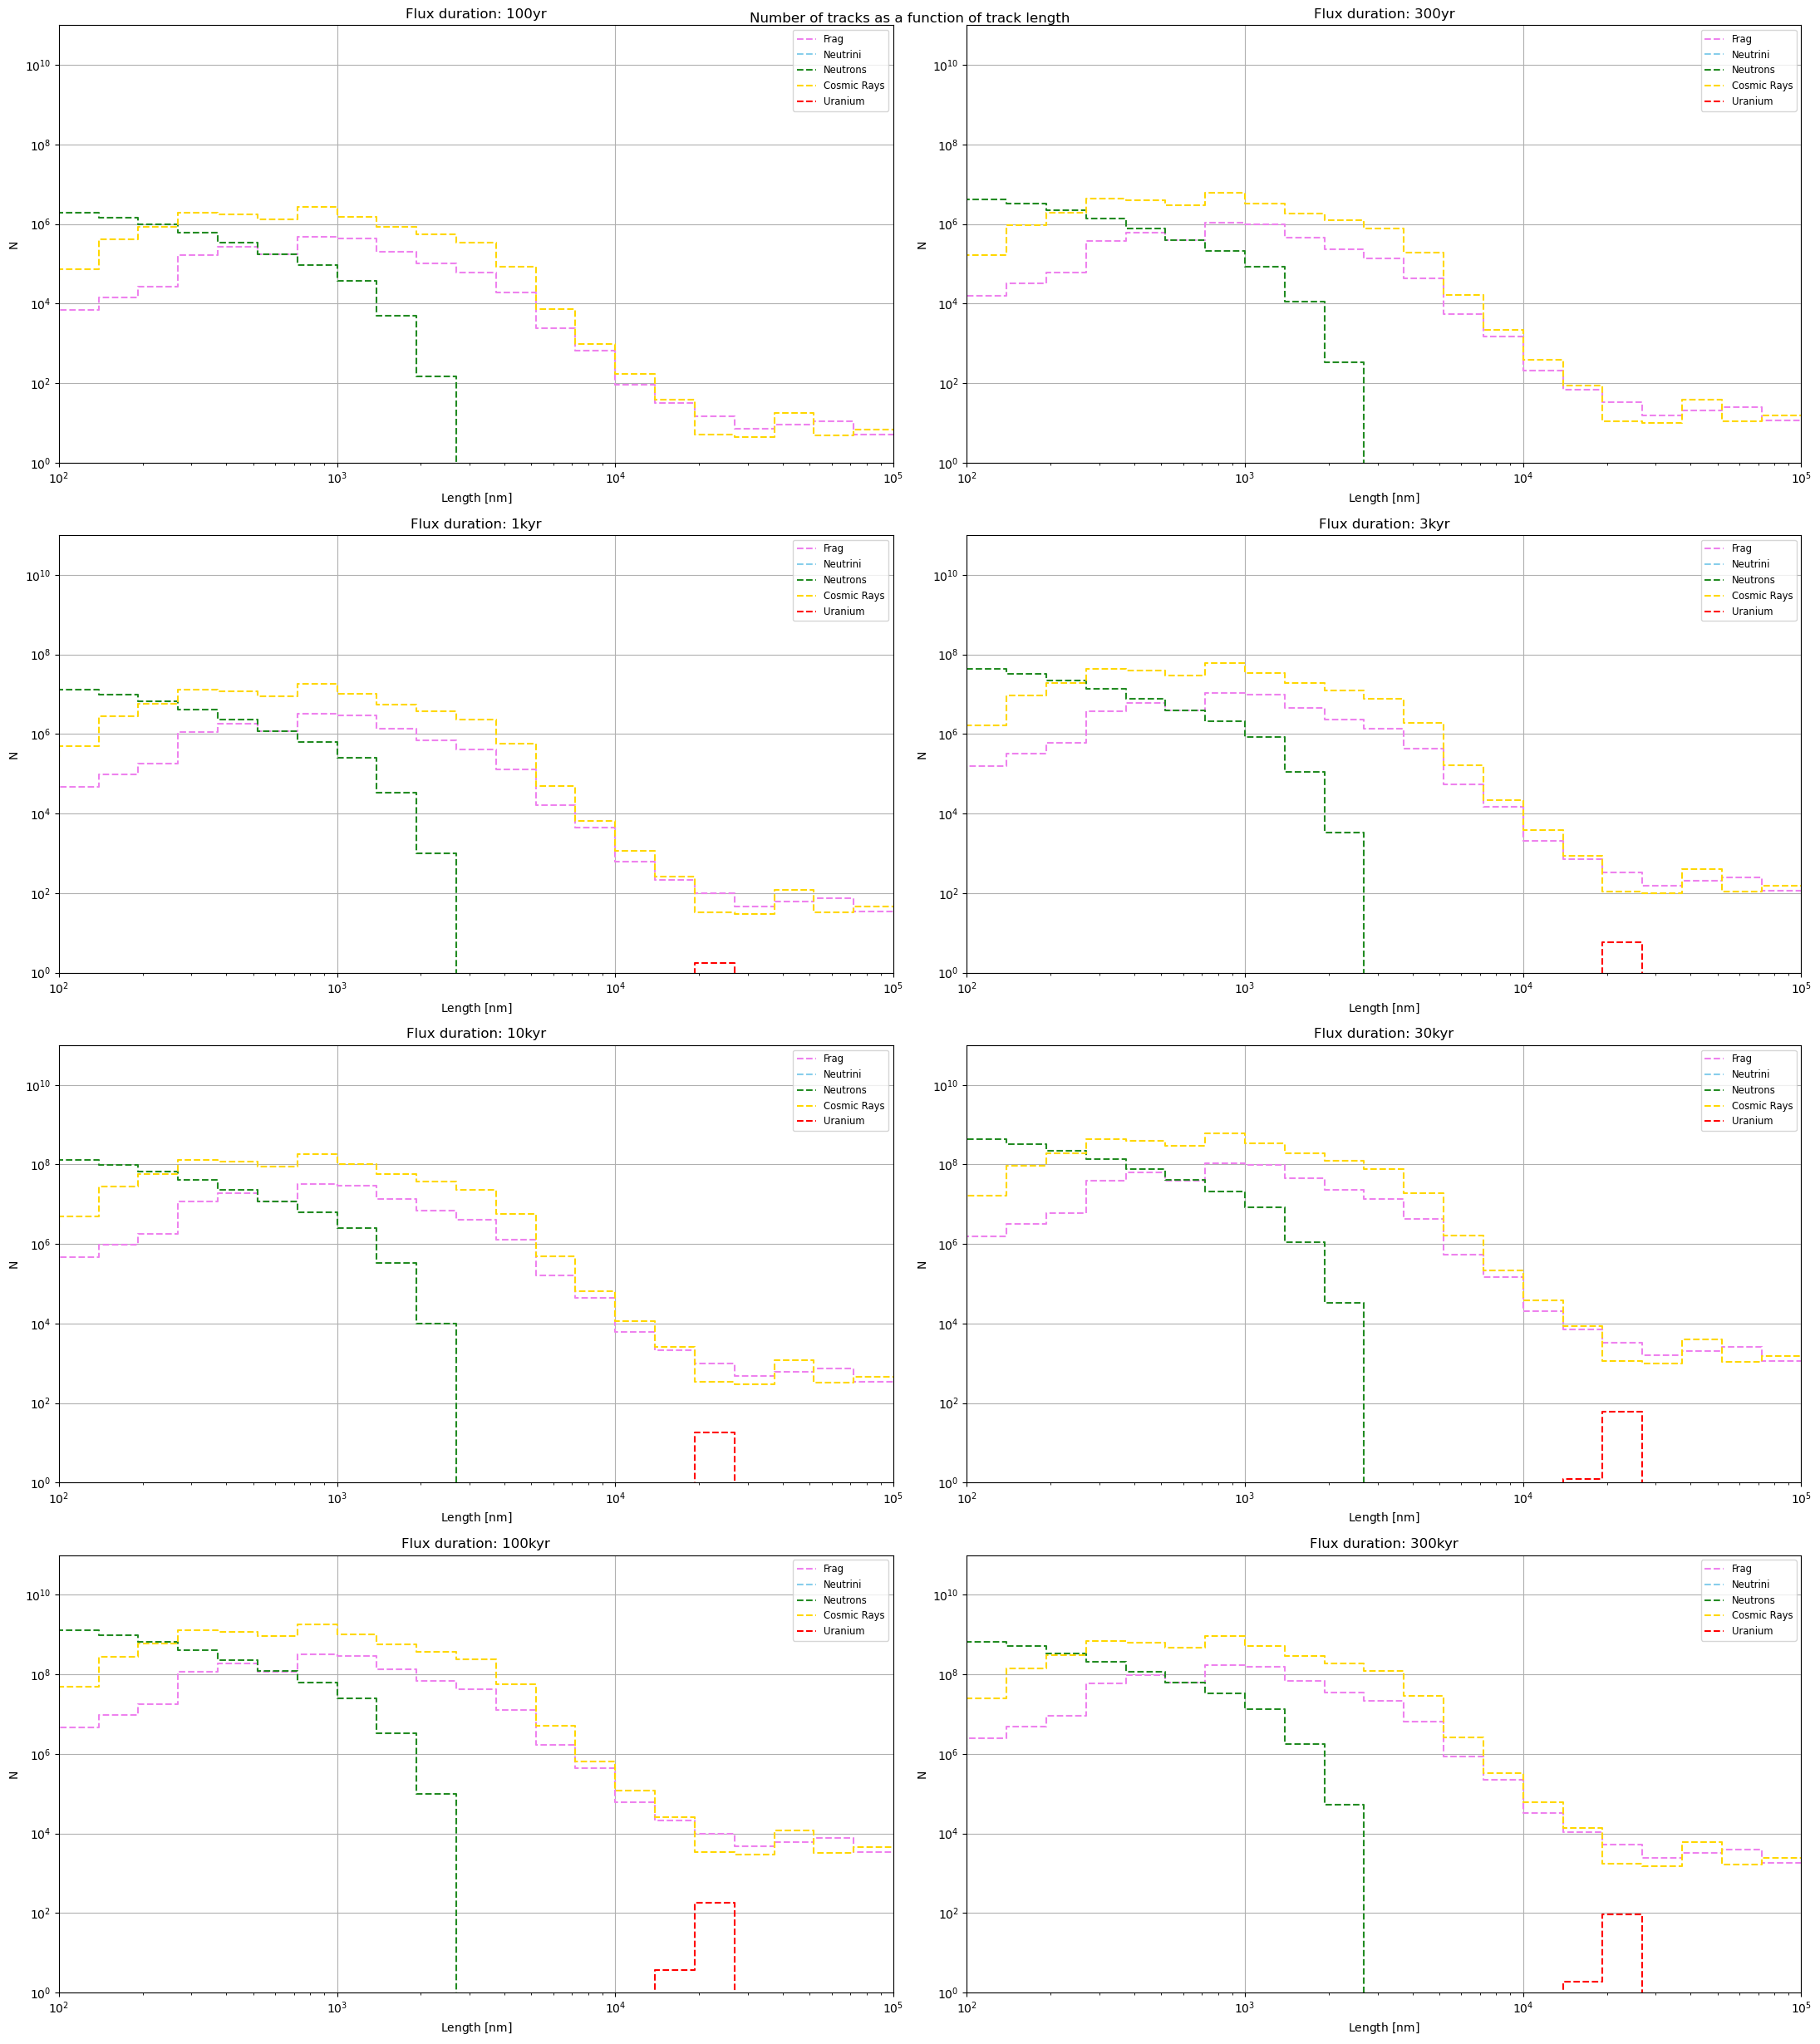

In [18]:
mass=0.1 #in kg

fig, axs = plt.subplots(4, 2, figsize=(22, 25))
fig.suptitle("Number of tracks as a function of track length")

for idx, n in enumerate(name):
    if idx < axs.size:
        ax = axs.flat[idx]  # Scorri attraverso i subplot in ordine lineare

    # Definiamo i bin su x (lunghezza) e calcoliamo dR/dx
    z_bins = np.linspace(0, 100000, 100000)
    zz_centre = z_bins[:-1] + np.diff(z_bins)/2.

    # Scelta dei bin di lunghezza (in nm), da 1e-2 a 1e5 su scala log:
    i_bins = np.logspace(-2, 5, 50)  # 20 bin => 21 edges

    # Integra y_values nei bin:
    counts_Signal = integrate_in_bins(zz_centre, y_valuesSig, i_bins, mass, arr_time[idx])
    counts_nu = integrate_in_bins(zz_centre, y_nu, i_bins, mass, arr_time[idx])
    counts_neutrons = integrate_in_bins(zz_centre, y_neutrons, i_bins, mass, arr_time[idx])
    counts_cosmics = integrate_in_bins(zz_centre, y_cosmicrays, i_bins, mass, arr_time[idx])
    counts_U = integrate_in_bins(zz_centre, yU_interp, i_bins, mass, arr_time[idx])

    #signal plot
    ax.step(i_bins, np.r_[counts_Signal, counts_Signal[-1]], where='post', color='violet', linestyle='--', label='Frag')

    #background plot
    ax.step(i_bins, np.r_[counts_nu, counts_nu[-1]], where='post', color='skyblue', linestyle='--', label='Neutrini') #non moltiplico questi background per factor perchè lo sono già le loro y
    ax.step(i_bins, np.r_[counts_neutrons, counts_neutrons[-1]], where='post', color='forestgreen', linestyle='--', label='Neutrons')
    ax.step(i_bins, np.r_[counts_cosmics, counts_cosmics[-1]], where='post', color='gold', linestyle='--', label='Cosmic Rays')
    ax.step(i_bins, np.r_[counts_U, counts_U[-1]], where='post', color='red', linestyle='--', label='Uranium')

    ax.set_xlabel("Length [$\\mathrm{nm}$]")
    ax.set_ylabel("N")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e2, 1e5)
    ax.set_ylim(1, 1e11)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
    ax.set_title("Flux duration: " + n)

plt.tight_layout()
plt.show()